# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for classifying qwerties
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202212

In [69]:
# import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-69-ce9febd6c44c>:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


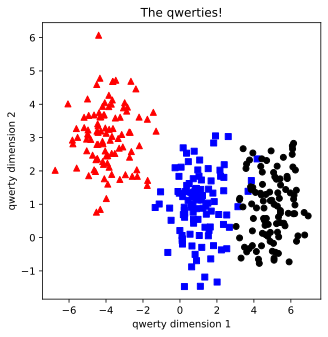

In [70]:
# create data

nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]
C = [-4,3]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),1+np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [71]:
# inspect types
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(300, 2)
 
<class 'torch.Tensor'>
torch.Size([300, 2])


In [72]:
# build the model
ANNclassify = nn.Sequential(
    nn.Linear(2,4),   # input layer
    nn.ReLU(),        # activation unit
    nn.Linear(4,3),    # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
    nn.Softmax(dim=1)
      )
# other model features

learningRate = .01

# loss function
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)


In [73]:
yHat = ANNclassify(data)

print(data.shape)
print(yHat.shape)

torch.Size([300, 2])
torch.Size([300, 3])


In [74]:
numepochs = 10000

# initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []

# loop over epochs
for epochi in range(numepochs):

  # forward pass
  yHat = ANNclassify(data)

  # compute loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(yHat,axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()              # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100
  ongoingAcc.append( accuracyPct )              # add to list of accuracies



# final forward pass
predictions = ANNclassify(data)

predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

In [75]:
yHat

tensor([[9.0030e-01, 9.6395e-02, 3.3022e-03],
        [9.6401e-01, 1.7309e-02, 1.8682e-02],
        [6.6983e-01, 3.2919e-01, 9.7988e-04],
        [9.3336e-01, 1.0822e-02, 5.5815e-02],
        [9.2704e-01, 6.0547e-02, 1.2413e-02],
        [9.2453e-01, 6.7090e-02, 8.3809e-03],
        [7.5031e-01, 2.4509e-01, 4.6063e-03],
        [9.6857e-01, 8.4416e-03, 2.2986e-02],
        [7.5958e-01, 2.3752e-01, 2.8957e-03],
        [9.6180e-01, 1.3741e-02, 2.4459e-02],
        [9.6048e-01, 2.3785e-02, 1.5735e-02],
        [9.6528e-01, 1.3030e-02, 2.1687e-02],
        [9.2335e-01, 1.1007e-02, 6.5645e-02],
        [8.3796e-01, 1.6041e-01, 1.6334e-03],
        [9.5988e-01, 1.0035e-02, 3.0088e-02],
        [9.6954e-01, 8.2551e-03, 2.2203e-02],
        [9.6079e-01, 9.8740e-03, 2.9338e-02],
        [9.5988e-01, 1.0035e-02, 3.0088e-02],
        [9.0896e-01, 8.7654e-02, 3.3870e-03],
        [9.6336e-01, 9.4120e-03, 2.7226e-02],
        [9.2471e-01, 1.0984e-02, 6.4302e-02],
        [9.3470e-01, 5.8539e-02, 6

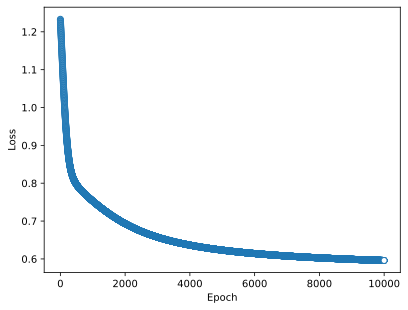

In [76]:
# show the losses

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [77]:
torch.argmax(yHat,axis=1)


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

Final accuracy: 98.3333%


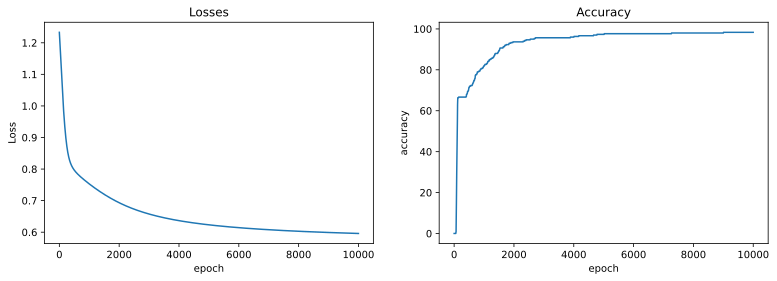

In [78]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()

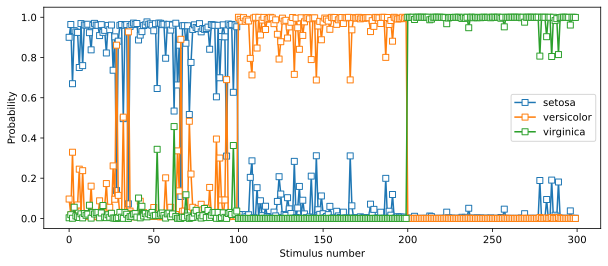

In [79]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

plt.plot(yHat.detach(),'s-',markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

In [80]:
sm = nn.Softmax(1)
torch.sum(sm(yHat),axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

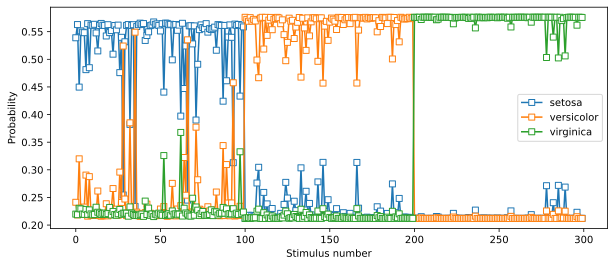

In [81]:
# with the softmax!
fig = plt.figure(figsize=(10,4))

plt.plot(sm(yHat.detach()),'s-',markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa','versicolor','virginica'])
plt.show()


# Additional explorations

In [82]:
# 1) It is common in DL to train the model for a specified number of epochs. But you can also train until
#    the model reaches a certain accuracy criterion. Re-write the code so that the model continues training
#    until it reaches 90% accuracy.
#    What would happen if the model falls into a local minimum and never reaches 90% accuracy? Yikes! You can
#    force-quit a process in google-colab by clicking on the top-left 'play' button of a code cell.
#
# 2) It is intuitive that the model can reach 100% accuracy if the qwerties are more separable. Modify the
#    qwerty-generating code to get the model to have 100% classification accuracy.
#

In [83]:
# train the model
numepochs = 1000
losses = torch.zeros(numepochs)
accuracy = 0

for epochi in range(numepochs):
# while accuracy < 0.95:

  # forward pass
  yHat = ANNclassify(data)

  # compute loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  accuracy = 1 - loss.detach().numpy()
  print(loss)
  # calculate the accuracy
  # y_pred = yHat.argmax(dim=1)
  # accuracy = (y_pred==labels).sum().item()/ len(labels)
  # print(accuracy)


tensor(0.5959, grad_fn=<NllLossBackward0>)
tensor(0.5959, grad_fn=<NllLossBackward0>)
tensor(0.5959, grad_fn=<NllLossBackward0>)
tensor(0.5959, grad_fn=<NllLossBackward0>)
tensor(0.5959, grad_fn=<NllLossBackward0>)
tensor(0.5959, grad_fn=<NllLossBackward0>)
tensor(0.5959, grad_fn=<NllLossBackward0>)
tensor(0.5959, grad_fn=<NllLossBackward0>)
tensor(0.5959, grad_fn=<NllLossBackward0>)
tensor(0.5959, grad_fn=<NllLossBackward0>)
tensor(0.5959, grad_fn=<NllLossBackward0>)
tensor(0.5959, grad_fn=<NllLossBackward0>)
tensor(0.5959, grad_fn=<NllLossBackward0>)
tensor(0.5959, grad_fn=<NllLossBackward0>)
tensor(0.5959, grad_fn=<NllLossBackward0>)
tensor(0.5959, grad_fn=<NllLossBackward0>)
tensor(0.5959, grad_fn=<NllLossBackward0>)
tensor(0.5959, grad_fn=<NllLossBackward0>)
tensor(0.5958, grad_fn=<NllLossBackward0>)
tensor(0.5958, grad_fn=<NllLossBackward0>)
tensor(0.5958, grad_fn=<NllLossBackward0>)
tensor(0.5958, grad_fn=<NllLossBackward0>)
tensor(0.5958, grad_fn=<NllLossBackward0>)
tensor(0.59

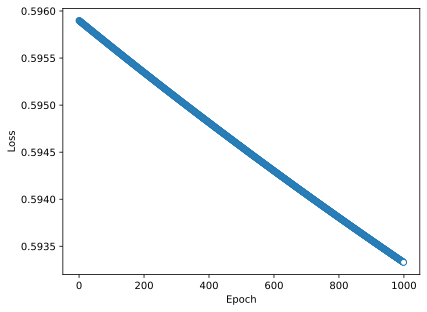

In [84]:
# show the losses

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()